# Correlate topic mixtures from MixEHR with ventilation duration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import seaborn as sns
%matplotlib inline

## Read data

In [2]:
mixtures = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/all_notes_train_mixehr/infer/infer_result.csv', header=None)
duration = pd.read_csv('/home/mcb/li_lab/zwen8/data/mimic/d2_phy_nurse_48/vent.txt', header=None, sep=' ')
duration = duration[1].astype(np.float64)

In [3]:
print(duration.shape)
print(mixtures.shape)

(4728,)
(17400, 50)


In [4]:
mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,55.288622,6.324626,15.324864,478.850013,1.812011,10.226657,3.472408,44.418875,15.793044,865.542786,...,137.710188,157.014237,6.666877,58.015707,1152.093147,15.584399,1.317950,1.533192,34.324306,3.621174
1,1.468678,2155.153249,3.571183,348.981725,18.927402,59.694296,1.495374,8.388599,5.287102,430.141779,...,2.330723,161.577649,64.461144,118.196813,1927.047859,21.097321,209.668526,8.600945,46.931735,6.103640
2,404.464999,256.204765,279.627128,350.259015,6.737052,1.324404,1.931417,91.093584,7.827464,1813.459226,...,31.659455,317.626008,41.150734,2209.586213,991.331349,2.293533,1.606431,5.326173,10.539671,2.308166
3,0.422316,0.603157,82.088922,1.052544,6.585892,135.665192,5.826866,1.898168,1.426641,519.360755,...,353.047632,95.825617,9.434005,429.616795,372.380201,18.774750,7.241797,4.280427,4.306930,0.379090
4,7.647221,5.772572,396.615407,154.741075,11.578411,20.248095,18.306202,286.668294,29.266985,2500.188120,...,133.725439,600.944317,14.999822,375.184383,801.995328,4.032056,6.412586,6.560906,6.007589,4.000648


In [5]:
duration.head()

0     83.733333
1    118.333333
2     82.666667
3    166.000000
4     69.000000
Name: 1, dtype: float64

## Normalize

In [6]:
normed_mixtures = pd.DataFrame(normalize(mixtures.iloc[:,2:51], norm='l1', axis=1))

In [7]:
mixtures.sum(axis=1)

0        5977.0
1        7602.0
2        9611.0
3        4320.0
4        8902.0
          ...  
17395     285.0
17396     747.0
17397     234.0
17398     308.0
17399      94.0
Length: 17400, dtype: float64

## See if mixture's rows sum up to 1

In [8]:
normed_mixtures.sum(axis=1)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
17395    1.0
17396    1.0
17397    1.0
17398    1.0
17399    1.0
Length: 17400, dtype: float64

## Heatmap

In [9]:
normed_mixtures.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.002591,0.080950,0.000306,0.001729,0.000587,0.007509,0.002670,0.146321,0.003679,0.052704,...,0.023280,0.026543,0.001127,0.009808,0.194762,0.002635,0.000223,0.000259,0.005803,0.000612
1,0.000656,0.064088,0.003476,0.010962,0.000275,0.001540,0.000971,0.078992,0.003863,0.083072,...,0.000428,0.029672,0.011838,0.021706,0.353887,0.003874,0.038504,0.001579,0.008619,0.001121
2,0.031242,0.039134,0.000753,0.000148,0.000216,0.010178,0.000875,0.202614,0.052317,0.028956,...,0.003537,0.035488,0.004598,0.246872,0.110759,0.000256,0.000179,0.000595,0.001178,0.000258
3,0.019007,0.000244,0.001525,0.031411,0.001349,0.000439,0.000330,0.120251,0.124495,0.076681,...,0.081743,0.022187,0.002184,0.099472,0.086220,0.004347,0.001677,0.000991,0.000997,0.000088
4,0.044621,0.017409,0.001303,0.002278,0.002060,0.032251,0.003293,0.281281,0.033984,0.007947,...,0.015045,0.067609,0.001688,0.042210,0.090228,0.000454,0.000721,0.000738,0.000676,0.000450


In [10]:
sorted_normed_mixtures = normed_mixtures.sort_values(by=normed_mixtures.columns[17], ascending=False)

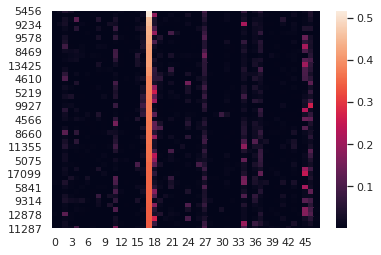

In [11]:
sns.set()
sns.heatmap(sorted_normed_mixtures.head(50))

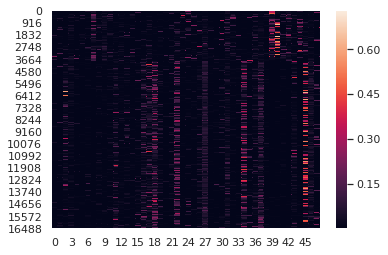

In [12]:
sns.heatmap(normed_mixtures)

## Compute correlation

In [13]:
corr = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method='pearson'))

In [14]:
corr_sorted = corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

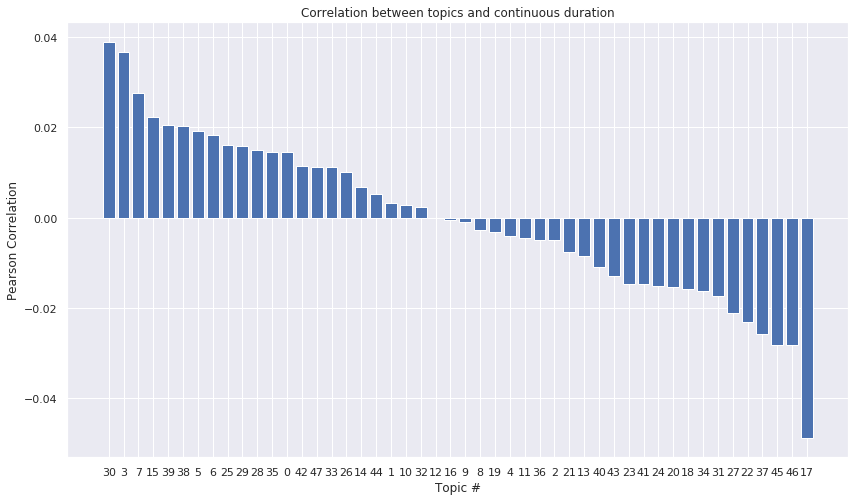

In [15]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(corr)), height=corr_sorted)
plt.title('Correlation between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(corr)), corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [16]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [17]:
top_pos = find_max_n(list(corr), 3)
top_neg = find_max_n(list(-corr), 3)

In [18]:
top_neg

[17, 46, 45]

In [19]:
top_topics = top_pos + top_neg
top_topics

[30, 3, 7, 17, 46, 45]

## Extract top words in those top topics

In [20]:
phis_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/all_notes_train_mixehr/data_JCVB0_nmar_K50_iter1000_phi_normalized.csv', header=None)

In [21]:
phis_df.columns = ['PLACE_HOLD', 'WORD_ID'] + [str(idx) for idx in range(50)]

In [22]:
phis_df.head()

,PLACE_HOLD,WORD_ID,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0,4.092960e-05,1.966630e-06,5.656030e-06,5.722390e-05,3.875380e-05,1.173240e-05,9.088160e-05,1.646310e-04,...,2.539160e-04,2.091310e-07,2.364300e-07,2.110040e-06,2.243220e-05,2.036260e-05,1.155990e-05,2.100230e-05,1.677720e-06,1.474560e-06
1,1,1,5.375820e-07,5.261120e-05,2.906370e-07,3.962020e-07,3.335960e-07,7.433030e-07,1.349800e-06,7.264600e-07,...,7.973600e-07,1.790500e-07,2.931520e-07,8.193110e-07,2.172850e-07,4.381230e-07,6.124180e-07,1.199800e-07,2.990830e-07,2.899270e-07
2,1,2,3.391050e-07,1.859800e-07,1.363590e-07,1.400000e-07,4.195120e-06,1.309550e-07,1.445750e-07,1.594670e-07,...,1.045450e-07,2.534930e-08,2.883260e-08,6.088160e-08,3.059400e-08,1.924420e-07,1.102200e-07,1.334020e-07,4.843370e-07,1.450890e-07
3,1,3,1.202740e-07,1.240390e-07,7.491410e-08,9.213650e-08,1.389080e-06,6.968190e-08,1.001330e-07,9.833980e-08,...,6.278840e-08,1.700480e-08,1.934980e-08,4.105630e-08,2.049800e-08,3.343840e-06,7.289890e-08,3.211610e-08,8.790870e-08,1.159020e-07
4,1,4,1.063270e-06,1.616440e-06,4.617520e-07,3.297910e-07,1.393730e-07,1.803430e-07,1.130880e-05,3.944240e-07,...,3.661680e-05,3.992840e-08,3.958530e-08,2.014430e-07,1.104700e-07,2.216720e-07,1.846640e-07,6.440670e-08,1.527920e-07,2.464670e-07


In [23]:
cols = ['WORD_ID'] + [str(value) for value in top_topics]

In [24]:
top_phis_df = phis_df[cols]

In [25]:
top_phis_df.head()

,WORD_ID,30,3,7,17,46,45
0,0,3.173800e-06,5.722390e-05,1.646310e-04,7.824780e-06,1.155990e-05,2.036260e-05
1,1,8.251690e-07,3.962020e-07,7.264600e-07,5.072450e-07,6.124180e-07,4.381230e-07
2,2,1.978940e-07,1.400000e-07,1.594670e-07,2.955910e-07,1.102200e-07,1.924420e-07
3,3,1.262890e-07,9.213650e-08,9.833980e-08,1.430890e-07,7.289890e-08,3.343840e-06
4,4,2.969810e-07,3.297910e-07,3.944240e-07,7.237850e-07,1.846640e-07,2.216720e-07


In [26]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/all_notes_train_mixehr/vocab.txt', header=None)

In [27]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [28]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aabg,2
3,aacute,3
4,aado,4


In [29]:
top_words_bytopic = [top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in top_topics]
top_words = []
for sublist in top_words_bytopic:
    for word in sublist:
        top_words.append(word)

In [30]:
word_topic_matrix = top_phis_df.iloc[[word_id for word_id in top_words]]

In [31]:
word_topic_matrix.head()

,WORD_ID,30,3,7,17,46,45
18372,18372,0.083492,5.480330e-07,7.446530e-07,0.000001,3.827250e-07,6.489020e-07
6868,6868,0.079024,3.959960e-06,5.422370e-04,0.000002,7.759380e-03,7.055710e-07
13899,13899,0.063591,8.463900e-04,6.046040e-05,0.000032,7.391490e-05,6.593290e-03
15961,15961,0.053011,8.625160e-03,2.237110e-03,0.000041,3.265940e-05,5.672030e-03
16261,16261,0.020757,1.878900e-05,3.644720e-05,0.000009,8.007410e-03,1.998340e-06


In [32]:
yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in top_words]
# xticklabels = ['23(pos)', '8(pos)', '36(pos)', '42(neg)', '17(neg)', '16(neg)']
xticklabels = [str(topic) + '(pos)' for topic in top_topics[0:3]] + [str(topic) + '(neg)' for topic in top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with continuous duration')

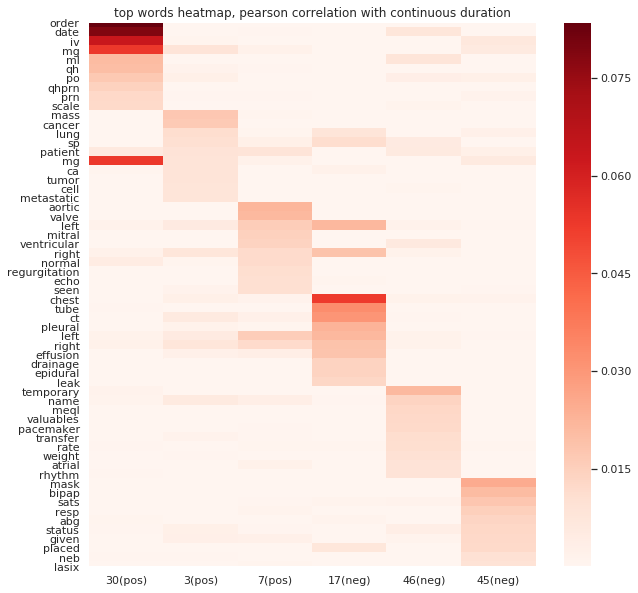

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels, cmap='Reds')
plt.title('top words heatmap, pearson correlation with continuous duration')

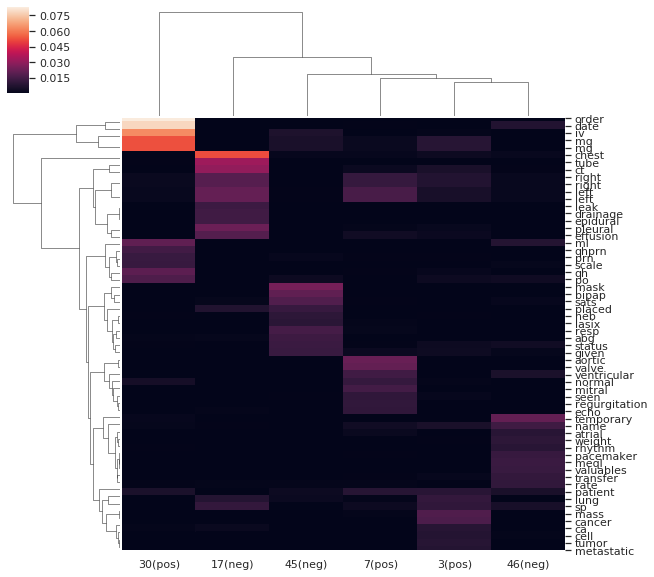

In [34]:
sns.set()
sns.clustermap(word_topic_matrix.iloc[:, 1:], yticklabels=yticklabels, xticklabels=xticklabels)

## Binary duration
Threshold at 7 day

In [35]:
binary_duration = (duration > 7 * 24).astype(int)

In [36]:
bi_corr = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method='pearson'))

In [37]:
bi_corr_sorted = bi_corr.sort_values(ascending=False)

Text(0, 0.5, 'Pearson Correlation')

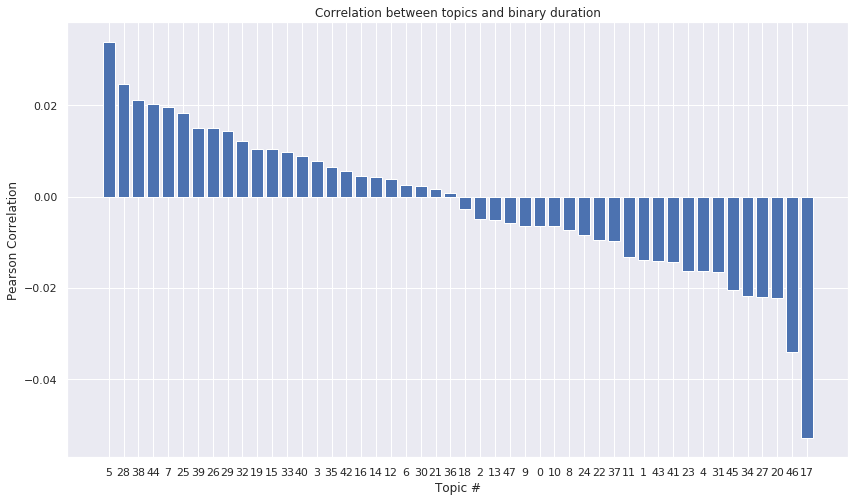

In [38]:
plt.figure(figsize=(14,8))
plt.bar(x=range(len(bi_corr)), height=bi_corr_sorted)
plt.title('Correlation between topics and binary duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_corr)), bi_corr_sorted.index)
plt.ylabel('Pearson Correlation')

## Select most correlated topics and map back to words

In [39]:
bi_top_topics = find_max_n(list(np.abs(bi_corr)), 6)

In [40]:
bi_top_pos = find_max_n(list(bi_corr), 3)
bi_top_neg = find_max_n(list(-bi_corr), 3)

In [41]:
bi_top_topics = bi_top_pos + bi_top_neg
bi_top_topics

[5, 28, 38, 17, 46, 20]

## Extract top words in those top topics

In [42]:
bi_cols = ['WORD_ID'] + [str(value) for value in bi_top_topics]

In [43]:
bi_top_phis_df = phis_df[bi_cols]

In [44]:
bi_top_phis_df.head()

,WORD_ID,5,28,38,17,46,20
0,0,1.173240e-05,1.368560e-06,5.717860e-06,7.824780e-06,1.155990e-05,5.640490e-05
1,1,7.433030e-07,5.536840e-07,3.887920e-07,5.072450e-07,6.124180e-07,1.891340e-07
2,2,1.309550e-07,1.709820e-07,1.307530e-07,2.955910e-07,1.102200e-07,2.474100e-06
3,3,6.968190e-08,1.817950e-07,5.829250e-08,1.430890e-07,7.289890e-08,4.379910e-06
4,4,1.803430e-07,1.857820e-07,1.586520e-07,7.237850e-07,1.846640e-07,4.894730e-07


In [45]:
vocab_df = pd.read_csv(r'/home/mcb/li_lab/zwen8/data/mimic/all_notes_train_mixehr/vocab.txt', header=None)

In [46]:
vocab_df.columns = ['WORD', 'WORD_ID']

In [47]:
vocab_df.head()

,WORD,WORD_ID
0,aa,0
1,aaa,1
2,aabg,2
3,aacute,3
4,aado,4


In [48]:
bi_top_words_bytopic = [bi_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_top_topics]
bi_top_words = []
for sublist in bi_top_words_bytopic:
    for word in sublist:
        bi_top_words.append(word)

In [49]:
bi_word_topic_matrix = bi_top_phis_df.iloc[[word_id for word_id in bi_top_words]]

In [50]:
bi_word_topic_matrix.head()

,WORD_ID,5,28,38,17,46,20
12126,12126,0.104582,0.005001,9.147180e-06,1.051250e-05,5.895130e-03,2.372640e-06
18479,18479,0.058355,0.000001,6.350710e-07,9.013050e-07,3.678870e-07,1.855810e-07
27773,27773,0.033461,0.000031,6.531990e-06,3.776460e-06,7.158690e-03,5.857830e-07
6450,6450,0.022955,0.000008,9.840180e-06,3.046410e-02,6.279650e-04,2.994010e-06
10573,10573,0.017311,0.000008,8.140680e-06,4.676260e-04,2.364990e-06,1.146390e-06


In [51]:
vocab_df.shape

(30763, 2)

In [52]:
bi_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in bi_top_words]
bi_xticklabels = [str(topic) + '(pos)' for topic in bi_top_topics[0:3]] + [str(topic) + '(neg)' for topic in bi_top_topics[3:]]

Text(0.5, 1, 'top words heatmap, pearson correlation with binarized duration')

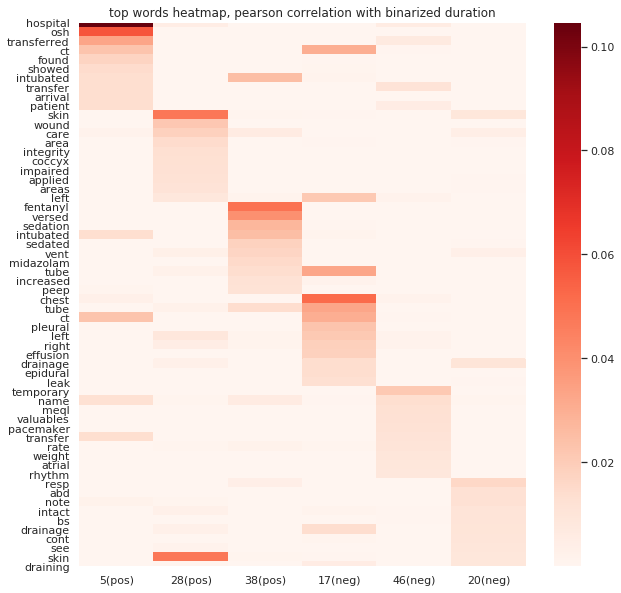

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels, cmap='Reds')
plt.title('top words heatmap, pearson correlation with binarized duration')

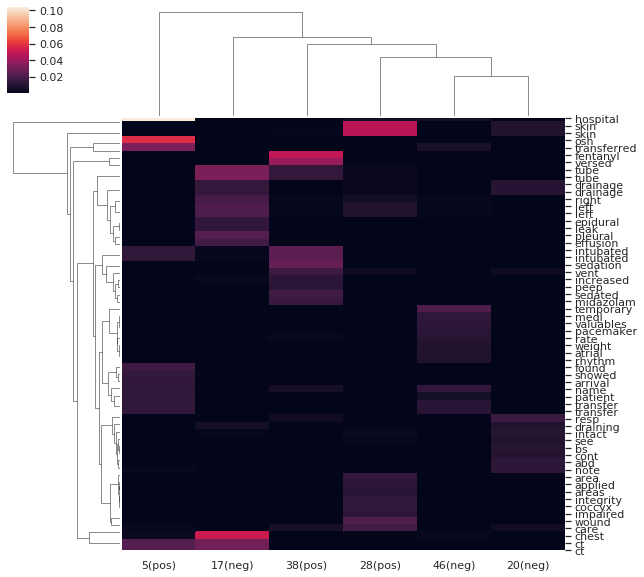

In [54]:
sns.set()
sns.clustermap(bi_word_topic_matrix.iloc[:, 1:], yticklabels=bi_yticklabels, xticklabels=bi_xticklabels)

## Try using cosine similarity instead of Pearson correlation
Because the correlation might not be linear

In [55]:
def inner_prod(series_1, series_2):
    return np.dot(series_1, series_2) / (np.linalg.norm(series_1, ord=2) * np.linalg.norm(series_2, ord=2))

In [56]:
cos = normed_mixtures.apply(lambda mixture: mixture.corr(duration, method=inner_prod))

In [57]:
cos_sorted = cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

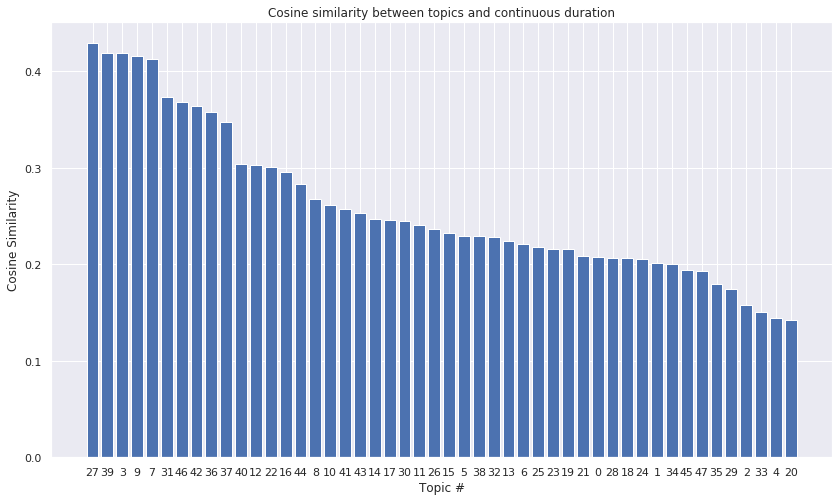

In [58]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(cos_sorted)), height=cos_sorted)
plt.title('Cosine similarity between topics and continuous duration')
plt.xlabel('Topic #')
plt.xticks(range(len(cos_sorted)), cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [59]:
def find_max_n(numbers, n=3):
    sorted_numbers = sorted(numbers, reverse=True)
    return [numbers.index(number) for number in sorted_numbers[0:n]]

In [60]:
cos_top_topics = find_max_n(list(cos), 6)

## Extract top words in those top topics

In [61]:
cos_cols = ['WORD_ID'] + [str(value) for value in cos_top_topics]

In [62]:
cos_top_phis_df = phis_df[cos_cols]

In [63]:
cos_top_phis_df.head()

,WORD_ID,27,39,3,9,7,31
0,0,2.499620e-05,1.948060e-05,5.722390e-05,3.809920e-05,1.646310e-04,1.002350e-06
1,1,4.778420e-04,1.597960e-07,3.962020e-07,8.811160e-08,7.264600e-07,4.177790e-07
2,2,9.899770e-08,1.271410e-07,1.400000e-07,1.828390e-08,1.594670e-07,3.012430e-07
3,3,6.596960e-08,4.271170e-08,9.213650e-08,1.227430e-08,9.833980e-08,1.262410e-07
4,4,1.968900e-07,1.115140e-07,3.297910e-07,6.071490e-08,3.944240e-07,3.118440e-07


In [64]:
cos_top_words_bytopic = [cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in cos_top_topics]
cos_top_words = []
for sublist in cos_top_words_bytopic:
    for word in sublist:
        cos_top_words.append(word)

In [65]:
cos_word_topic_matrix = cos_top_phis_df.iloc[[word_id for word_id in cos_top_words]]

In [66]:
cos_word_topic_matrix.head()

,WORD_ID,27,39,3,9,7,31
3914,3914,0.016443,4.492400e-07,0.000003,4.683290e-07,0.000006,0.000003
4112,4112,0.015040,6.467290e-04,0.000285,2.205950e-05,0.005361,0.000031
4280,4280,0.012946,3.177170e-06,0.000019,4.679260e-07,0.000574,0.000003
25149,25149,0.011886,3.329630e-05,0.010599,4.381070e-05,0.002735,0.002019
15961,15961,0.011015,1.875310e-05,0.008625,2.677280e-03,0.002237,0.016774


In [67]:
cos_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in cos_top_words]
cos_xticklabels = [str(topic) for topic in cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with continuous duration')

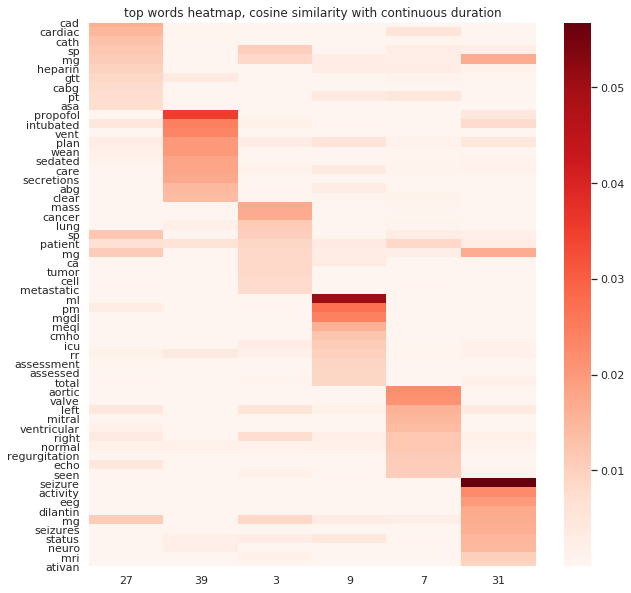

In [68]:
plt.figure(figsize=(10,10))
sns.heatmap(cos_word_topic_matrix.iloc[:, 1:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels, cmap='Reds')
plt.title('top words heatmap, cosine similarity with continuous duration')

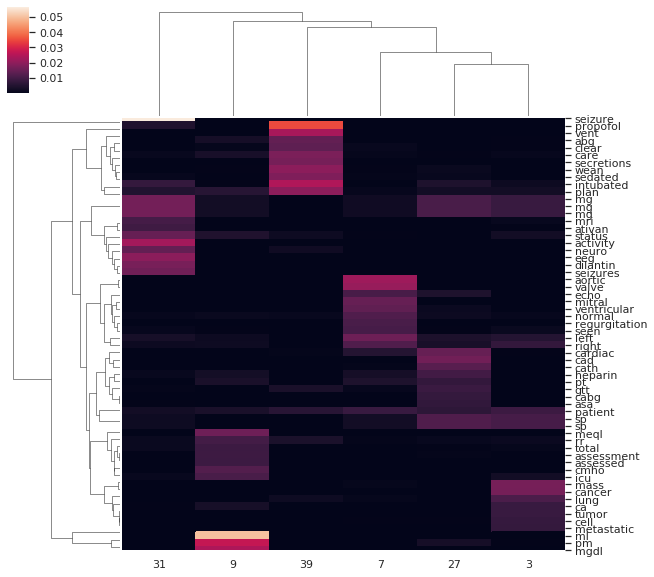

In [69]:
sns.set()
sns.clustermap(cos_word_topic_matrix.iloc[:, 1:], yticklabels=cos_yticklabels, xticklabels=cos_xticklabels)

### Try binarized

In [70]:
bi_cos = normed_mixtures.apply(lambda mixture: mixture.corr(binary_duration, method=inner_prod))

In [71]:
bi_cos_sorted = bi_cos.sort_values(ascending=False)

Text(0, 0.5, 'Cosine Similarity')

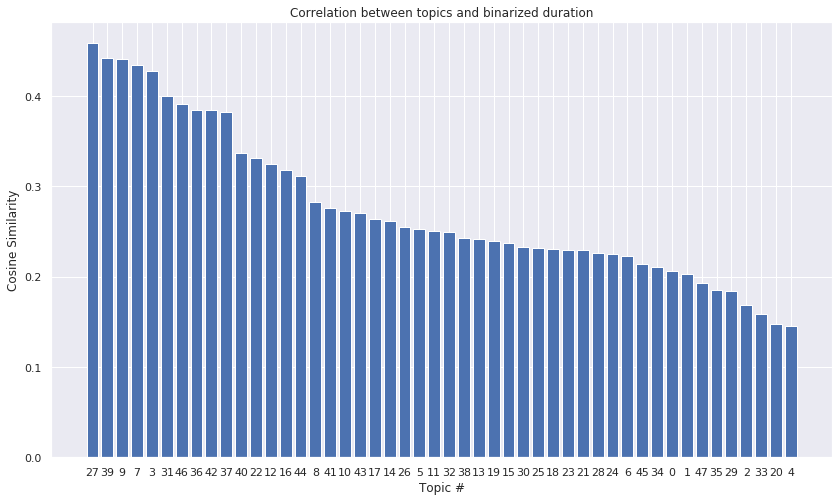

In [72]:
plt.figure(figsize=(14, 8))
plt.bar(x=range(len(bi_cos_sorted)), height=bi_cos_sorted)
plt.title('Correlation between topics and binarized duration')
plt.xlabel('Topic #')
plt.xticks(range(len(bi_cos_sorted)), bi_cos_sorted.index)
plt.ylabel('Cosine Similarity')

## Select most correlated topics and map back to words

In [73]:
bi_cos_top_topics = find_max_n(list(bi_cos), 6)

## Extract top words in those top topics

In [74]:
bi_cos_cols = ['WORD_ID'] + [str(value) for value in bi_cos_top_topics]

In [75]:
bi_cos_top_phis_df = phis_df[bi_cos_cols]

In [76]:
bi_cos_top_phis_df.head()

,WORD_ID,27,39,9,7,3,31
0,0,2.499620e-05,1.948060e-05,3.809920e-05,1.646310e-04,5.722390e-05,1.002350e-06
1,1,4.778420e-04,1.597960e-07,8.811160e-08,7.264600e-07,3.962020e-07,4.177790e-07
2,2,9.899770e-08,1.271410e-07,1.828390e-08,1.594670e-07,1.400000e-07,3.012430e-07
3,3,6.596960e-08,4.271170e-08,1.227430e-08,9.833980e-08,9.213650e-08,1.262410e-07
4,4,1.968900e-07,1.115140e-07,6.071490e-08,3.944240e-07,3.297910e-07,3.118440e-07


In [77]:
# bi_cos_top_phis_df.sort_values(by='21', ascending=False)

In [78]:
bi_cos_top_words_bytopic = [bi_cos_top_phis_df.sort_values(by=str(topic), ascending=False)['WORD_ID'][0:10] for topic in bi_cos_top_topics]
bi_cos_top_words = []
for sublist in bi_cos_top_words_bytopic:
    for word in sublist:
        bi_cos_top_words.append(word)

In [79]:
bi_cos_word_topic_matrix = bi_cos_top_phis_df.iloc[[word_id for word_id in bi_cos_top_words]]

In [80]:
bi_cos_word_topic_matrix.head()

,WORD_ID,27,39,9,7,3,31
3914,3914,0.016443,4.492400e-07,4.683290e-07,0.000006,0.000003,0.000003
4112,4112,0.015040,6.467290e-04,2.205950e-05,0.005361,0.000285,0.000031
4280,4280,0.012946,3.177170e-06,4.679260e-07,0.000574,0.000019,0.000003
25149,25149,0.011886,3.329630e-05,4.381070e-05,0.002735,0.010599,0.002019
15961,15961,0.011015,1.875310e-05,2.677280e-03,0.002237,0.008625,0.016774


In [81]:
bi_cos_yticklabels = [vocab_df[vocab_df['WORD_ID'] == word_id]['WORD'].values[0] for word_id in bi_cos_top_words]
bi_cos_xticklabels = [str(topic) for topic in bi_cos_top_topics]

Text(0.5, 1, 'top words heatmap, cosine similarity with binarized duration')

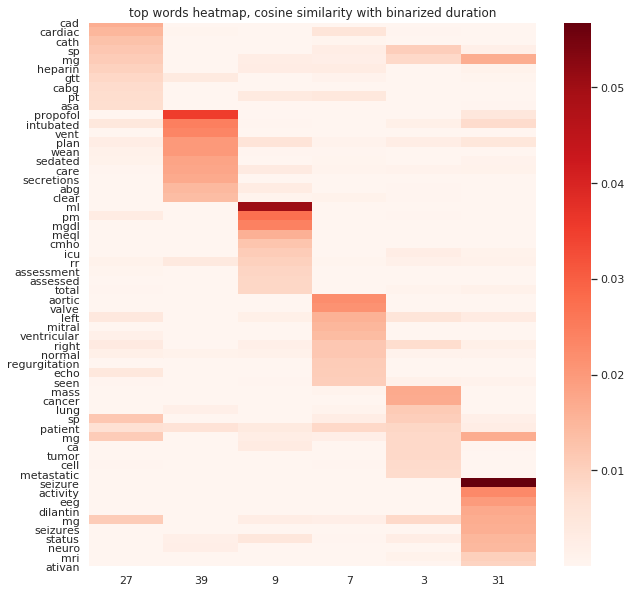

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(bi_cos_word_topic_matrix.iloc[:, 1:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels, cmap='Reds')
plt.title('top words heatmap, cosine similarity with binarized duration')

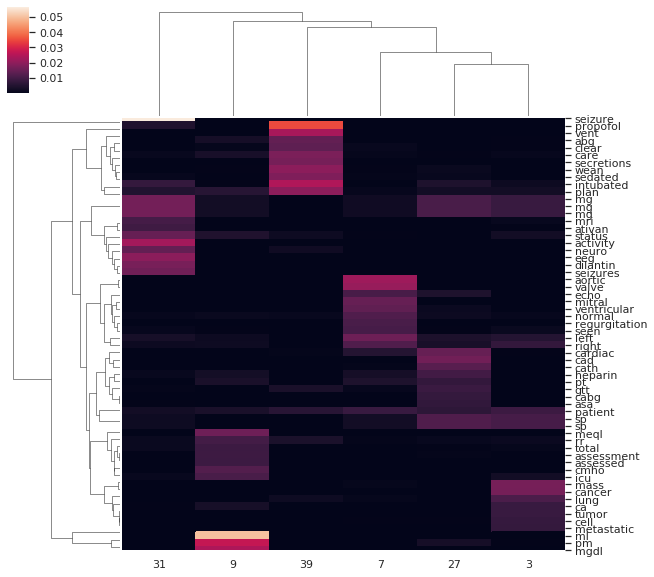

In [83]:
sns.set()
sns.clustermap(bi_cos_word_topic_matrix.iloc[:, 1:], yticklabels=bi_cos_yticklabels, xticklabels=bi_cos_xticklabels)